# Importing Libraries 

In [108]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix


# Loading dataset 

In [109]:
News=pd.read_csv('C:/Users/wiki/Desktop/news.csv')

In [110]:
News.shape

(6335, 4)

In [111]:
News.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [112]:
df=pd.DataFrame(News)

In [113]:
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [114]:
df.drop(['Unnamed: 0'], axis=1)

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL



# Splitting data into training and testing datasets

In [115]:
X_train, X_test ,y_train,y_test =train_test_split(df['text'],df.label,test_size=0.2,random_state=20)

In [116]:
X_train

4741    NAIROBI, Kenya — President Obama spoke out Sun...
2089    Killing Obama administration rules, dismantlin...
4074    Dean Obeidallah, a former attorney, is the hos...
5376      WashingtonsBlog \nCNN’s Jake Tapper hit the ...
6028    Some of the biggest issues facing America this...
                              ...                        
5910      From the day we are born into this world, we...
3915    Chaosistan , Iraq , Phenomenon of Terrorism By...
1428    Senate Minority Leader Harry M. Reid (D-Nev.) ...
4367    WASHINGTON — The U.S. government started keepi...
2522    Gary Johnson is the presidential nominee for t...
Name: text, Length: 5068, dtype: object

In [117]:
y_test

4494    FAKE
2548    FAKE
5397    FAKE
3998    FAKE
1982    FAKE
        ... 
3865    REAL
680     FAKE
4424    REAL
1470    FAKE
5907    REAL
Name: label, Length: 1267, dtype: object

# Initialize the Vectorizer

In [118]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english',max_df=0.7)

In [119]:
dfidf_train=tfidf_vectorizer.fit_transform(X_train)
tfidf_test=tfidf_vectorizer.transform(X_test)

# Training the passive aggressive classifier 

In [120]:
pac=PassiveAggressiveClassifier(max_iter=60)
pac.fit(dfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=60)

# Predicting the results

In [121]:
y_pred=pac.predict(tfidf_test)

# Checking our model's performance 

In [122]:
score=accuracy_score(y_test,y_pred)
print(f'Accuracy:{round(score*100,2)}%')

Accuracy:95.42%


In [123]:
news_cm=confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

In [124]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                news_cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     news_cm.flatten()/np.sum(news_cm)]

<AxesSubplot:>

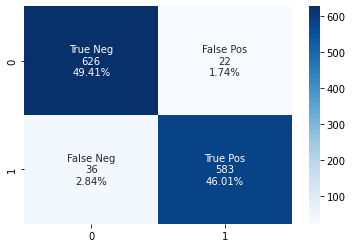

In [125]:
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(news_cm, annot=labels, fmt='', cmap='Blues')